In [91]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report


In [92]:
# Cargar los datos
df = pd.read_csv("heart_disease_uci.csv")  # Asegúrate de que el archivo está en el mismo directorio


# **Diccionario de Variables del Dataset**



| Nombre en Dataset | Descripción en Español |
|------------------|--------------------------------------------------|
| `id` | Identificador único del paciente. Lo quitamos del dataset por no ser util en este estudio |
| `age` | Edad del paciente (en años). |
| `sex` | Sexo del paciente (Male = Hombre, Female = Mujer). |
| `dataset` | Origen del dataset (ej. Cleveland, Hungary, etc.). Lo quitamos del dataset por no ser util en este estudio |
| `cp` | Tipo de dolor en el pecho (angina típica, atípica, etc.). |
| `trestbps` | Presión arterial en reposo (mm Hg). |
| `chol` | Colesterol sérico (mg/dL). |
| `fbs` | Glucosa en ayuno (>120 mg/dL: True = Sí, False = No). |
| `restecg` | Resultados del electrocardiograma en reposo. |
| `thalch` | Frecuencia cardíaca máxima alcanzada. |
| `exang` | Angina inducida por ejercicio (True = Sí, False = No). |
| `oldpeak` | Depresión del segmento ST tras el ejercicio. |
| `slope` | Pendiente del segmento ST en el ECG. |
| `ca` | Número de vasos coloreados mediante fluoroscopía. |
| `thal` | Resultado del test de talio (defecto fijo, normal, etc.). |
| `num` | Presencia de enfermedad cardíaca (0 = No, 1-4 = Sí, distintos grados). |

> **Notas:**
> - **ECG (Electrocardiograma en reposo):** Registro de la actividad eléctrica del corazón en reposo.
> - **Segmento ST y prueba de esfuerzo:** Indicadores clave para evaluar isquemia cardíaca.
> - **Número de vasos coloreados (`ca`):** Cuantos vasos sanguíneos fueron visibles en el test de fluoroscopía.
> - **Test de Talio (`thal`):** Evalúa la circulación sanguínea en el corazón mediante imágenes nucleares.



## Limpiamos las columnas que no vamos a usar en este dataset

In [93]:
df.drop(columns=['id', 'dataset'], inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Cambiamos los nombres para que sean entendibles

In [94]:
# Diccionario con los nombres en español
columnas_nuevas = {
    'age': 'edad',
    'sex': 'sexo',
    'cp': 'tipo_dolor_pecho',
    'trestbps': 'presion_arterial',
    'chol': 'colesterol',
    'fbs': 'glucosa_ayuno_alta',
    'restecg': 'ecg_reposo',
    'thalch': 'frecuencia_cardiaca_max',
    'exang': 'angina_por_ejercicio',
    'oldpeak': 'depresion_ST',
    'slope': 'pendiente_ST',
    'ca': 'vasos_coloreados',
    'thal': 'prueba_talio',
    'num': 'enfermedad_cardiaca'  # Variable objetivo
}

# Renombrar las columnas
df.rename(columns=columnas_nuevas, inplace=True)

# Mostrar las primeras filas para verificar
df.head()


,edad,sexo,tipo_dolor_pecho,presion_arterial,colesterol,glucosa_ayuno_alta,ecg_reposo,frecuencia_cardiaca_max,angina_por_ejercicio,depresion_ST,pendiente_ST,vasos_coloreados,prueba_talio,enfermedad_cardiaca
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Descripción del método del análisis que vamos a realizar

- en nuestro dataset tenemos varias columnas con valores nulos, pero como vemos que algunos de las columnas con menos datos son determinantes para la predicción vamos a implementar kNN con distancia adaptativa


        Este método permite que kNN ignore las columnas con valores nulos en cada instancia individual, en lugar de eliminar filas o imputar valores.

## Limpieza del dataset
-   Las columnas de **sex**, **fbs** (Glucosa en ayuno (>120 mg/dL: True = Sí, False = No)) y **exang** (Angina inducida por ejercicio (True = Sí, False = No)) las podemos tratar como binarios

In [95]:
# Convertir variables binarias a 0 y 1
df['sexo'] = df['sexo'].map({'Male': 1, 'Female': 0})
df['glucosa_ayuno_alta'] = df['glucosa_ayuno_alta'].map({True: 1, False: 0})
df['angina_por_ejercicio'] = df['angina_por_ejercicio'].map({True: 1, False: 0})

df


,edad,sexo,tipo_dolor_pecho,presion_arterial,colesterol,glucosa_ayuno_alta,ecg_reposo,frecuencia_cardiaca_max,angina_por_ejercicio,depresion_ST,pendiente_ST,vasos_coloreados,prueba_talio,enfermedad_cardiaca
0,63,1,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,asymptomatic,127.0,333.0,1.0,st-t abnormality,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62,1,typical angina,NaN,139.0,0.0,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1,asymptomatic,122.0,223.0,1.0,st-t abnormality,100.0,0.0,0.0,NaN,NaN,fixed defect,2
918,58,1,asymptomatic,NaN,385.0,1.0,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Limpiamos las columnas categóricas

Usamos get_dummies para generar columnas con datos TRUE/FALSE de cada uno de los datos en las variables categóricas


In [96]:
from sklearn.preprocessing import OneHotEncoder
# # Variables categóricas que vamos a convertir
# columnas_categoricas = ['sexo', 'tipo_dolor_pecho', 'ecg_reposo', 'prueba_talio', 'pendiente_ST']

# # Aplicar One-Hot Encoding
# df_limpio = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# # Verificamos que todo sea numérico o booleano
# print(df_limpio.dtypes)
# df_limpio.head()


# Definir columnas categóricas
columnas_categoricas = ['tipo_dolor_pecho', 'ecg_reposo', 'prueba_talio', 'pendiente_ST']

# Inicializar OneHotEncoder con `sparse=False` para evitar matrices dispersas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicar OneHotEncoder correctamente
df_encoded = encoder.fit_transform(df[columnas_categoricas])

# Obtener los nombres de las nuevas columnas
columnas_nuevas = encoder.get_feature_names_out(columnas_categoricas)

# Convertir a DataFrame y mantener el índice original
df_encoded = pd.DataFrame(df_encoded, columns=columnas_nuevas, index=df.index)

# Concatenar con el DataFrame original (eliminando las columnas categóricas viejas)
df_limpio = pd.concat([df.drop(columns=columnas_categoricas), df_encoded], axis=1)

# Mostrar el resultado
df_limpio.head()



,edad,sexo,presion_arterial,colesterol,glucosa_ayuno_alta,frecuencia_cardiaca_max,angina_por_ejercicio,depresion_ST,vasos_coloreados,enfermedad_cardiaca,...,ecg_reposo_st-t abnormality,ecg_reposo_nan,prueba_talio_fixed defect,prueba_talio_normal,prueba_talio_reversable defect,prueba_talio_nan,pendiente_ST_downsloping,pendiente_ST_flat,pendiente_ST_upsloping,pendiente_ST_nan
0,63,1,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,67,1,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,67,1,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,37,1,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Cambiamos los balores booleanos a 1/0
-   como tenemos algunos NaN, los tenemos que convertir a .astype('Int64') para que esa columna los soporte

In [97]:
# Identificar las columnas booleanas
columnas_booleanas = df_limpio.select_dtypes(include=['bool']).columns

# Convertir solo las columnas booleanas a 'Int64' (permite NaN y enteros)
df_limpio[columnas_booleanas] = df_limpio[columnas_booleanas].astype('Int64')

# Verificar que todas las columnas sean numéricas y que los NaN no se han perdido
print(df_limpio.dtypes)
df_limpio.head()


edad                                  int64
sexo                                  int64
presion_arterial                    float64
colesterol                          float64
glucosa_ayuno_alta                  float64
frecuencia_cardiaca_max             float64
angina_por_ejercicio                float64
depresion_ST                        float64
vasos_coloreados                    float64
enfermedad_cardiaca                   int64
tipo_dolor_pecho_asymptomatic       float64
tipo_dolor_pecho_atypical angina    float64
tipo_dolor_pecho_non-anginal        float64
tipo_dolor_pecho_typical angina     float64
ecg_reposo_lv hypertrophy           float64
ecg_reposo_normal                   float64
ecg_reposo_st-t abnormality         float64
ecg_reposo_nan                      float64
prueba_talio_fixed defect           float64
prueba_talio_normal                 float64
prueba_talio_reversable defect      float64
prueba_talio_nan                    float64
pendiente_ST_downsloping        

,edad,sexo,presion_arterial,colesterol,glucosa_ayuno_alta,frecuencia_cardiaca_max,angina_por_ejercicio,depresion_ST,vasos_coloreados,enfermedad_cardiaca,...,ecg_reposo_st-t abnormality,ecg_reposo_nan,prueba_talio_fixed defect,prueba_talio_normal,prueba_talio_reversable defect,prueba_talio_nan,pendiente_ST_downsloping,pendiente_ST_flat,pendiente_ST_upsloping,pendiente_ST_nan
0,63,1,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,67,1,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,67,1,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,37,1,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Dividimos los datos entre predictoras y objetivos

In [98]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_limpio.drop(columns=['enfermedad_cardiaca'])  # Eliminamos la columna objetivo
df_limpio['enfermedad_cardiaca'] = (df_limpio['enfermedad_cardiaca'] > 0).astype('Int64')

y = df_limpio['enfermedad_cardiaca']  # Variable objetivo


## Normalizamos los Datos
kNN usa distancias, así que si los datos tienen escalas diferentes, el modelo se sesga. Usamos StandardScaler para normalizar:

In [99]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos (para que kNN no dé más peso a valores grandes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.00738556,  0.51693097,  0.67528731, ..., -0.77459667,
        -0.5320941 , -0.71114578],
       [ 1.43203377,  0.51693097,  1.46248251, ...,  1.29099445,
        -0.5320941 , -0.71114578],
       [ 1.43203377,  0.51693097, -0.63670469, ...,  1.29099445,
        -0.5320941 , -0.71114578],
       ...,
       [ 0.15808914,  0.51693097, -0.53174533, ..., -0.77459667,
        -0.5320941 ,  1.40618145],
       [ 0.4765753 ,  0.51693097,         nan, ..., -0.77459667,
        -0.5320941 ,  1.40618145],
       [ 0.90122351,  0.51693097, -0.63670469, ..., -0.77459667,
        -0.5320941 ,  1.40618145]], shape=(920, 25))

Manejamos Valores NaN
Si aún hay valores NaN, los rellenamos con un imputador basado en kNN: KNNImputer. Este lo que hace es aplicar knn a los X vecinos y remplaza los NaN con la media de los X vecinos. 

In [100]:
from sklearn.impute import KNNImputer

# Imputar valores NaN con KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_scaled_imputed = imputer.fit_transform(X_scaled)


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_imputed, y, test_size=0.2, random_state=42)

# Entrenar kNN con distancia adaptativa
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# Evaluar la precisión del modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🔹 Precisión del modelo kNN: {accuracy * 100:.2f}%")



🔹 Precisión del modelo kNN: 79.89%


In [102]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.78        75
         1.0       0.88      0.76      0.82       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



##  Regresión logística

In [103]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
# Crear el modelo de Regresión Logística
df_limpio['enfermedad_cardiaca'] = (df_limpio['enfermedad_cardiaca'] > 0).astype('Int64')


y = df_limpio['enfermedad_cardiaca']
from sklearn.preprocessing import StandardScaler

# Normalizar los datos (para que kNN no dé más peso a valores grandes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

from sklearn.impute import KNNImputer

# Imputar valores NaN con KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_imputed, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=10000)

# Entrenar el modelo con el conjunto de entrenamiento
log_reg.fit(X_train, y_train)
# Realizar predicciones con el conjunto de prueba
y_pred = log_reg.predict(X_test)
# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
y

Accuracy: 80.43%


0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: enfermedad_cardiaca, Length: 920, dtype: Int64


Matriz de Confusión:
[[61 14]
 [22 87]]


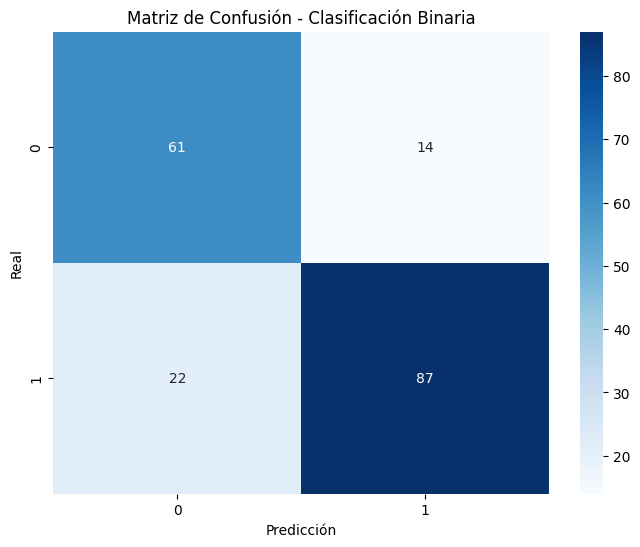

In [104]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [105]:
# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 (> Media)

In [106]:
# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 (> Media)

In [107]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

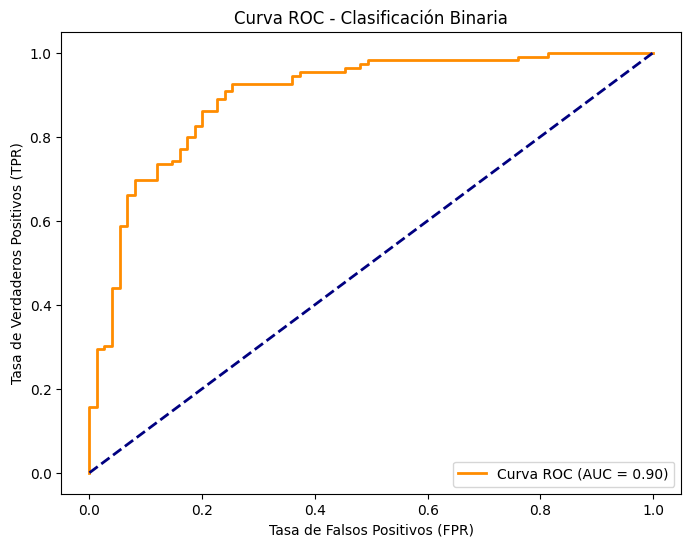

In [108]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria')
plt.legend(loc='lower right')
plt.show()

In [109]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        75
         1.0       0.86      0.80      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

